# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Young-Min Kong

Datum: 15. November 2023

Gruppe: 12

## Forschungsfrage

Wie beeinflussen die anfänglichen Temperaturen von heißem Wasser und kaltem Wasser sowie deren Mischverhältnis die resultierende Temperatur nach dem Mischen, und wie können diese Erkenntnisse zur Bestimmung der Wärmekapazität genutzt werden

## Versuchsaufbau und Durchführung

Materialien:
1. Zwei identische Tassen oder Becher
2. Zwei Temperatursensoren
3. Heißes Wasser
4. Kaltes Wasser

Vorbereitung:
Temperatursensoren in den beiden Behältern legen.

Durchführung:
Heiße Wasser in eine der Tassen und das kalte Wasser in die andere gießen.
Beide Wassermengen vermischen.
Temperaturen messen, bis stabile Endtemperatur erreicht ist.

Messungen:
Temperaturdaten in data/data1.h5 registriert.

<img src="figures/Versuch1.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
import pandas as pd
import h5py as h5
from datetime import datetime
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
path = r"data/data1.h5"

In [3]:
f = h5.File(path)

dset_cold = f[list(f.keys())[0]]
dset_warm = f[list(f.keys())[1]]

df_cold = pd.DataFrame({'Timestamp': np.array([i - dset_cold[1][0] for i in dset_cold[1]]),
                    'temperature': np.array(list(dset_cold[0]))})
df_warm = pd.DataFrame({'Timestamp': np.array([i - dset_warm[1][0] for i in dset_warm[1]]),
                    'temperature': np.array(list(dset_warm[0]))})

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


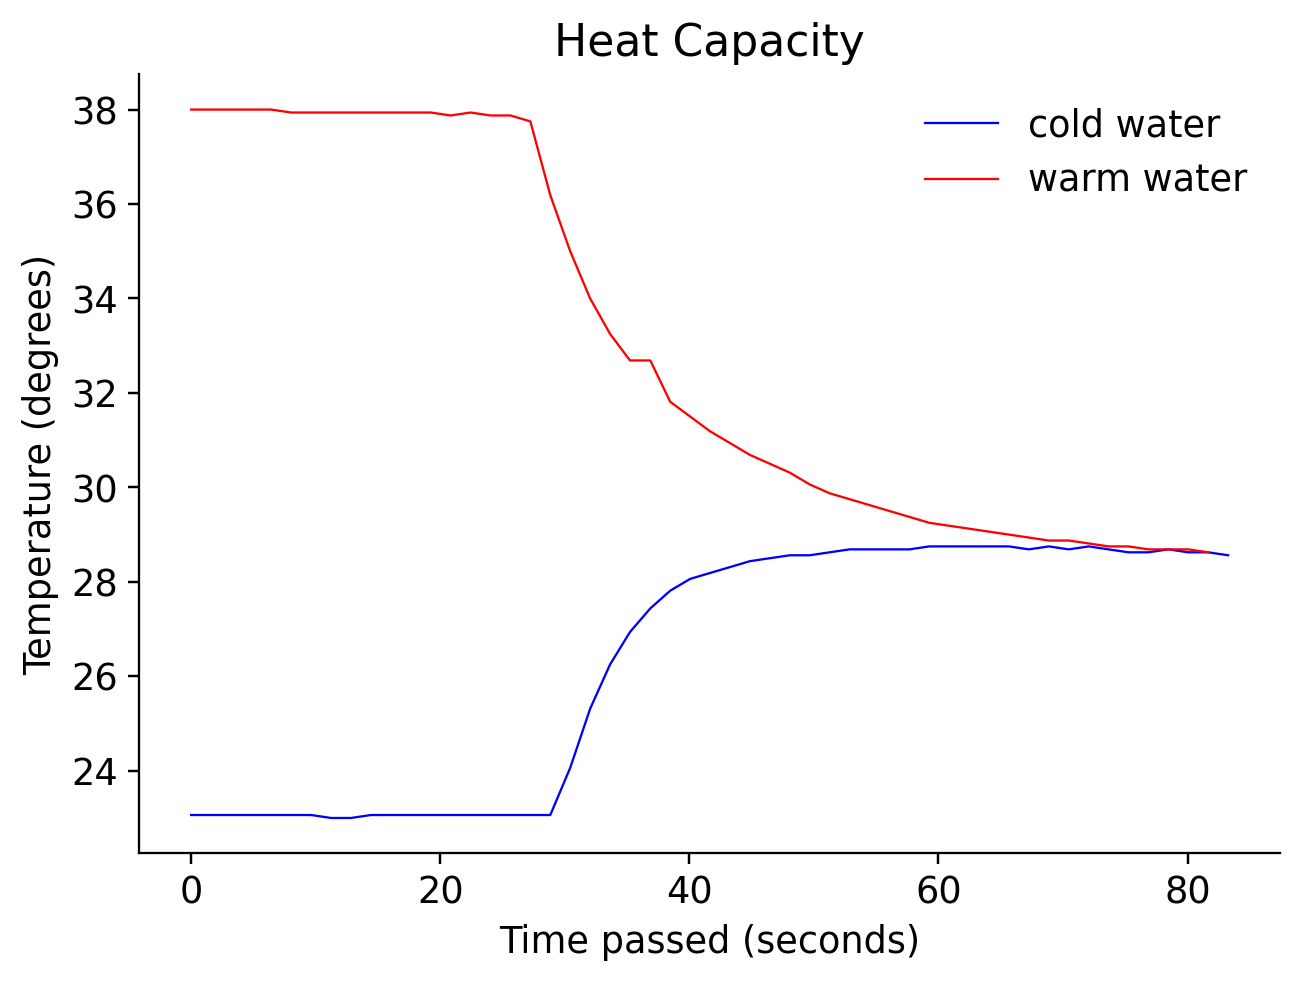

In [4]:
plt.plot(df_cold.Timestamp, df_cold.temperature, label = "cold water", color = "b")
plt.plot(df_warm.Timestamp, df_warm.temperature, label = "warm water", color = "r")

plt.title("Heat Capacity")
plt.legend()
plt.xlabel("Time passed (seconds)")
plt.ylabel("Temperature (degrees)")
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
c_w = 4.18 # water heat capacity

m = int(m_json.get_json_entry('datasheets', "1ee82048-0880-668a-8622-b6bc7d41c645" ,['probe', 'amount in ml'])) # mass in grams
m = m/1000 # mass in kg

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# Calculation of temperature data necessary to determine the specific heat capacity
# initial values : 
T_1 = dset_cold[0][0]    # cold water initial temperature
T_2 = dset_warm[0][0]    # warm water initial temperature
# final values:
T_M = 1/2 * (dset_cold[0][-1]+dset_warm[0][-1])  # final temperature

print(T_1)
print(T_2)
print(T_M)

23.0625
38.0
28.59375


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
C = (m*c_w*(T_2-T_M))/(T_M-T_1) - (m*c_w)

#### (Vi) Ergebnis

In [8]:
print("Wärmekapazität Wasser:", C, "kJ/K")

Wärmekapazität Wasser: 0.29283615819209036 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Aus wissenschaftlicher Sicht könnten die Ergebnisse der Wärmekapazitätsberechnung wichtige Einblicke in die thermodynamischen Eigenschaften des Wassers und in den Wärmeaustauschprozess bieten.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Dieser Versuch bot wertvolle Erkenntnisse über die Wärmekapazität von Wasser und die damit verbundenen Faktoren.